<center>
<h1 style="color: #007BC4;">Python</h1> 
<h3 style="color: #333333;">Pandas</h3> 
</center>
<br>


<h2>Contenidos</h2>
<div class="alert alert-block alert-info" 
     style="margin-top: 20px; padding-top:0px; border: 1px solid #007BC4; border-radius: 20px; background:transparent;">
    <ul>
        <li><a href="#intro">Introducción</a></li>
        <li><a href="#series">Series</a></li>
        <li><a href="#read"> Lectura de un archivo csv y creación de un DataFrame</a></li>
        <li><a href="#op">Operaciones sobre el DataFrame</a></li>
    </ul>
</div>

<a name="intro"></a>
<h2 style="color: #007BC4;">Introducción</h2>
<hr style="border: 0.5px solid #007BC4;">

Librería más utilizada en Data Analysis. Principales características:
<pre>
    •	Capacidad de trabajar con distintos datasets con diferentes formatos, como series temporales, tablas de datos heterogéneos y matrices.

    •	Simplificar la lectura y escritura de archivos CSV, Excel, SQL…

    •	Sinfín de operaciones: agrupamiento, filtrado, combinación, reordenamiento de datos…

    •	Posibilidad de manejar datos faltantes y conversión de variables categóricas.

    •	Facilidad de representación
</pre>



Este cuaderno incluye una selección de ejemplos. Para ampliar información podéis consultar la documentación de referencia en página web de <a href="https://pandas.pydata.org/pandas-docs/stable/index.html">Pandas</a>.

In [11]:
# Importamos la librería pandas
import pandas as pd

# Importamos también numpy porque lo utilizaremos en algunos ejemplos
import numpy as np



<a name="intro"></a>
<h2 style="color: #007BC4;">Series</h2>
<hr style="border: 0.5px solid #007BC4;">
<h3>Array de 1 dimensión</h3>

A partir de un array de numpy, sin especificar un índice asigna uno automáticamente:


In [12]:
import numpy as np

serie_ejemplo = pd.Series(np.array([1,2,3,4,5,6]))
serie_ejemplo

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

In [13]:
type(serie_ejemplo)

pandas.core.series.Series

<h3 style="color: #007BC4;">Creando los índices</h3>

A partir de arrays de numpy:

In [14]:
notas = np.array([5,10,7,8])
alumnos = np.array(["Estudiante 1","Estudiante 2","Estudiante 3","Estudiante 4"])
serie_2 = pd.Series(notas, index=alumnos)

serie_2

Estudiante 1     5
Estudiante 2    10
Estudiante 3     7
Estudiante 4     8
dtype: int64

A partir de diccionarios:

In [15]:
notas_alumnos = {'Estudiante 1': 5, 'Estudiante 2': 10, 'Estudiante 3': 7, 'Estudiante 4': 8}
serie_3 = pd.Series(notas_alumnos)

serie_3

Estudiante 1     5
Estudiante 2    10
Estudiante 3     7
Estudiante 4     8
dtype: int64

<h3 style="color: #007BC4;">Asignación de valores</h3>


In [16]:
serie_3['Estudiante 1'] = 10    #.loc implícito
#serie_3.loc['Estudiante 1'] = 10 

#serie_3[1] = 8
serie_3.iloc[1] =8

#serie_3[2:] = 9
serie_3.iloc[3:] = 9

In [17]:
serie_3

Estudiante 1    10
Estudiante 2     8
Estudiante 3     7
Estudiante 4     9
dtype: int64

<h3 style="color: #007BC4;">Otras operaciones</h3>


Podemos calcular la media:

In [18]:
serie_3.mean()

np.float64(8.5)

In [19]:
np.mean(serie_3)

np.float64(8.5)

Generar valores con arange: similar a range pero el resultado aquí es un array NumPy

In [20]:
numeros = np.arange(1,10,1)
serie_numeros = pd.Series(numeros, index = numeros)

cuadrados = serie_numeros ** 2
cuadrados

1     1
2     4
3     9
4    16
5    25
6    36
7    49
8    64
9    81
dtype: int64

In [21]:
cuadrados/cuadrados

1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
dtype: float64

<a name="intro"></a>
<h2 style="color: #007BC4;">Dataframe</h2>
<hr style="border: 0.5px solid #007BC4;">

<h3>Array de 2 dimensiones </h3>
filas x columnas 
Cada columna puede ser de un tipo distinto. Una columna en DataFrame es de tipo Series.


Creación de un DataFrame usando diccionarios de Series.

In [22]:
asignaturas = ['Asignatura 1','Asignatura 2','Asignatura 3','Asignatura 4']
notas= {'Estudiante 1': pd.Series([10,2,5,6], index = asignaturas),
        'Estudiante 2': pd.Series([9,6,7,4.5],index = asignaturas)}
notas_df= pd.DataFrame(notas)

notas_df

,Estudiante 1,Estudiante 2
Asignatura 1,10,9.0
Asignatura 2,2,6.0
Asignatura 3,5,7.0
Asignatura 4,6,4.5


Claramente dataframe.columns se corresponde con las etiquetas de las columnas del DataFrame

In [23]:
notas = {'Estudiante_1': [10,2,5,6],'Estudiante_2':[9,6,7,4.5]}
notas_df = pd.DataFrame(notas)
notas_df.index = ['Asignatura_1','Asignatura_2','Asignatura_3','Asignatura_4']
notas_df.columns = ['María','Jose']

notas_df

,María,Jose
Asignatura_1,10,9.0
Asignatura_2,2,6.0
Asignatura_3,5,7.0
Asignatura_4,6,4.5


<a name="read"></a>
<h2 style="color: #007BC4;"> Lectura de un archivo <code>csv</code> y creación de un DataFrame</h2>
<hr style="border: 0.5px solid #007BC4;">

Utilizaremos la función <code>read_csv</code> (<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html?highlight=read_csv">documentación de la función</a>) para leer  conjuntos de datos desde archivo. La función admite una gran cantidad de parámetros, además del nombre del archivo y el separador.

In [24]:
df = pd.read_csv("data/FuelConsumption.csv")

<a name="op"></a>
<h2 style="color: #007BC4;"> Operaciones sobre el DataFrame</h2>
<hr style="border: 0.5px solid #007BC4;">

<h3> Mostrar información sobre el conjunto de datos </h3>

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


<h3> Mostrar las primeras filas</h3>

In [26]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Obtener las dimensiones del conjunto de datos

In [27]:
df.shape

(1067, 13)

<h3>Obtener los nombres de las columnas (son las claves del DataFrame) </h3>

In [28]:
df.keys()

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

<br>
<h3>Obtener el tipo de las columnas</h3>

In [29]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

<h3> Obtener el número de valores únicos (distintos) en cada columna</h3>

In [30]:
df.nunique()

MODELYEAR                     1
MAKE                         39
MODEL                       663
VEHICLECLASS                 16
ENGINESIZE                   45
CYLINDERS                     7
TRANSMISSION                 22
FUELTYPE                      4
FUELCONSUMPTION_CITY        167
FUELCONSUMPTION_HWY         118
FUELCONSUMPTION_COMB        148
FUELCONSUMPTION_COMB_MPG     43
CO2EMISSIONS                159
dtype: int64

### <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.insert.html">Añadir una columna</a>

Inserta una columna en la posición indicada

In [47]:
df.insert(1,'ES_FORD',df.MAKE=='FORD')

ValueError: cannot insert ES_FORD, already exists

In [49]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html">Borrar una columna </a>
Tenemos dos métodos: *drop* y *del*


Con **del**: solo sirve para eliminar columnas (no filas) y modifica el dataframe original

In [48]:
del df['ES_FORD']


In [34]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Con **drop**: podemos no modificar el dataframe original, solo se modifica si ponemos <code>inplace=True</code> 

In [50]:
df.insert(1,'ES_FORD',df.MAKE=='FORD') #volvemos a crearla
df.head()

,MODELYEAR,ES_FORD,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,False,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,False,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,False,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,False,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,False,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [51]:
df2=df.drop('ES_FORD', axis=1)  #elimino la columna
#df2=df.drop('ES_FORD', inplace =True)
df2.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [52]:
df.head()

,MODELYEAR,ES_FORD,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,False,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,False,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,False,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,False,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,False,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Prueba a hacerlo con más columnas, pero cuidado! crea alguna primero para no perder los datos originales...

<h3> Acceder a un elemento</h3>

En el siguiente código se accede al tercer elemento de la primera fila utilizando los índices

In [38]:
df.iloc[0,2]

'ACURA'

Y en siguiente código a través del nombre de la columna y el índice de la fila (elemento de la tercera fila de la columna <code>ENGINESIZE</code>). Es más eficiente que .loc cuando trabajamos con un solo valor.

In [39]:
df.at[2,'ENGINESIZE']

np.float64(1.5)

<h3>Obtener los elementos de una o varias columnas</h3>

En el código siguiente se obtienen todas las filas de la columna <code>ENGINESIZE</code>

In [40]:
df[['ENGINESIZE']] # Es un dataframe

,ENGINESIZE
0,2.0
1,2.4
2,1.5
3,3.5
4,3.5
...,...
1062,3.0
1063,3.2
1064,3.0
1065,3.2


In [41]:
df['ENGINESIZE'] # Es un Series

0       2.0
1       2.4
2       1.5
3       3.5
4       3.5
       ... 
1062    3.0
1063    3.2
1064    3.0
1065    3.2
1066    3.2
Name: ENGINESIZE, Length: 1067, dtype: float64

O podemos obtener las filas de varias columnas:

In [42]:
df[['ENGINESIZE','CO2EMISSIONS']]

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
...,...,...
1062,3.0,271
1063,3.2,264
1064,3.0,271
1065,3.2,260


<h4>Obtener el número de elementos de cada valor</h4>

In [43]:
df['MAKE'].value_counts()

MAKE
FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
GMC              49
AUDI             49
TOYOTA           49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
NISSAN           33
KIA              33
CADILLAC         32
JEEP             31
MAZDA            27
HYUNDAI          24
SUBARU           23
JAGUAR           22
LEXUS            22
INFINITI         21
HONDA            21
CHRYSLER         19
LAND ROVER       19
MITSUBISHI       16
BUICK            16
RAM              13
ACURA            12
LINCOLN          11
VOLVO            11
FIAT             10
SCION             9
BENTLEY           8
ASTON MARTIN      7
ROLLS-ROYCE       7
MASERATI          6
LAMBORGHINI       3
SRT               2
SMART             2
Name: count, dtype: int64

<h4>Creación de un nuevo DataFrame aplicando filtros sobre otro</h4>

En el siguiente código se crea un nuevo DataFrame con las filas que cumplan que <code>CYLINDERS</code> sean mayor que 6 y la marca sea Bentley

In [44]:
df2 = df[(df['CYLINDERS'] > 6) & (df['MAKE'] == 'BENTLEY')]
df2.head()

,MODELYEAR,ES_FORD,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
68,2014,False,BENTLEY,CONTINENTAL GT,SUBCOMPACT,4.0,8,AS8,Z,15.4,9.8,12.9,22,297
69,2014,False,BENTLEY,CONTINENTAL GT,SUBCOMPACT,6.0,12,AS8,Z,18.8,11.5,15.5,18,356
70,2014,False,BENTLEY,CONTINENTAL GT CONVERTIBLE,SUBCOMPACT,4.0,8,AS8,Z,16.8,10.3,13.9,20,320
71,2014,False,BENTLEY,CONTINENTAL GT SPEED CONVERTIBLE,SUBCOMPACT,6.0,12,AS8,Z,20.0,12.2,16.5,17,380
72,2014,False,BENTLEY,CONTINENTAL GTC,SUBCOMPACT,4.0,8,AS8,Z,16.7,10.6,14.0,20,322


## Para ampliar:
  
<a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas-dataframe-dropna">Eliminar valores faltantes con .dropna <a>

 <a href="https://pandas.pydata.org/docs/reference/api/pandas.concat.html"> Concatenar DataFrames </a>

 <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html"> Fusionar DataFrames</a>
 


<h4>Mostrando gráficas de los datos</h4>

Podemos hacer representaciones gráficas de los datos con la función <code>plot</code> (<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot">documentación de la función</a>).

Ejemplo de gráfica de puntos:

<Axes: xlabel='FUELCONSUMPTION_HWY', ylabel='CO2EMISSIONS'>

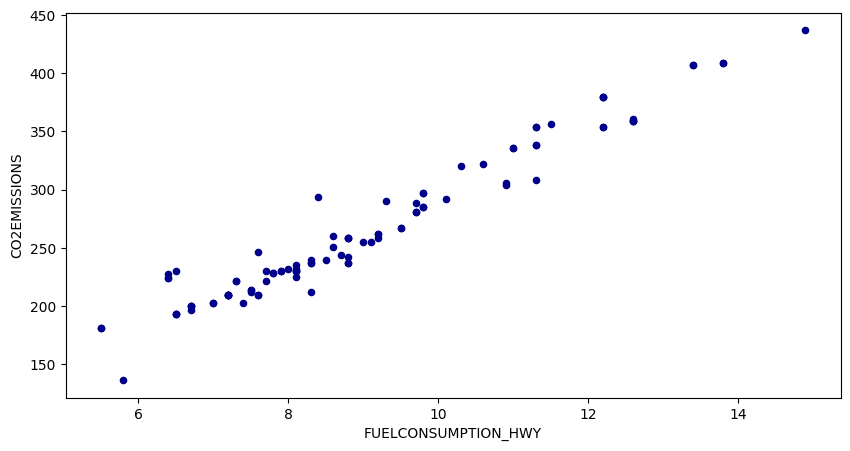

In [54]:
df[0:100].plot(kind='scatter', x='FUELCONSUMPTION_HWY', y='CO2EMISSIONS', color='DarkBlue',figsize=(10,5))

Ejemplo de gráfica de barras:

<Axes: xlabel='FUELCONSUMPTION_HWY'>

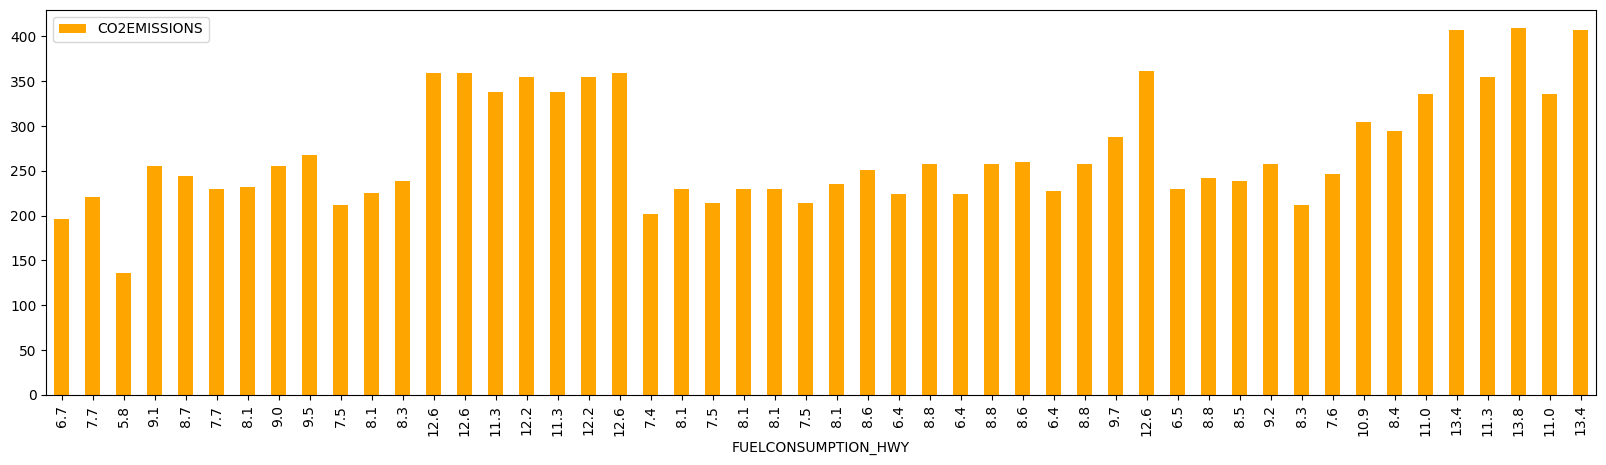

In [70]:
df[0:50].plot(kind='bar', x='FUELCONSUMPTION_HWY', y='CO2EMISSIONS', color='Orange',figsize=(20,5))